In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pandas as pd
import numpy as np

In [6]:
data = pd.read_csv("heart_failure_clinical_records - heart_failure_clinical_records.csv")
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1


In [7]:
data.shape

(5000, 13)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       5000 non-null   float64
 1   anaemia                   5000 non-null   int64  
 2   creatinine_phosphokinase  5000 non-null   int64  
 3   diabetes                  5000 non-null   int64  
 4   ejection_fraction         5000 non-null   int64  
 5   high_blood_pressure       5000 non-null   int64  
 6   platelets                 5000 non-null   float64
 7   serum_creatinine          5000 non-null   float64
 8   serum_sodium              5000 non-null   int64  
 9   sex                       5000 non-null   int64  
 10  smoking                   5000 non-null   int64  
 11  time                      5000 non-null   int64  
 12  DEATH_EVENT               5000 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 507.9 KB


In [9]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [10]:
data.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [11]:
print(data['age'].nunique())
data['age'].unique()

48


array([55.   , 65.   , 45.   , 60.   , 95.   , 70.   , 63.   , 50.   ,
       53.   , 60.667, 72.   , 64.   , 75.   , 66.   , 58.   , 42.   ,
       69.   , 68.   , 49.   , 51.   , 44.   , 59.   , 90.   , 61.   ,
       46.   , 80.   , 56.   , 41.   , 85.   , 82.   , 67.   , 52.   ,
       43.   , 81.   , 48.   , 57.   , 40.   , 86.   , 77.   , 73.   ,
       62.   , 87.   , 79.   , 47.   , 94.   , 71.   , 78.   , 54.   ])

In [12]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,60.288736,0.474400,586.760600,0.439400,37.734600,0.364800,265075.404370,1.369106,136.808200,0.645600,0.311800,130.678800,0.313600
std,11.697243,0.499394,976.733979,0.496364,11.514855,0.481422,97999.758622,1.009750,4.464236,0.478379,0.463275,77.325928,0.464002
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,0.000000,4.000000,0.000000
25%,50.000000,0.000000,121.000000,0.000000,30.000000,0.000000,215000.000000,0.900000,134.000000,0.000000,0.000000,74.000000,0.000000
50%,60.000000,0.000000,248.000000,0.000000,38.000000,0.000000,263358.030000,1.100000,137.000000,1.000000,0.000000,113.000000,0.000000
75%,68.000000,1.000000,582.000000,1.000000,45.000000,1.000000,310000.000000,1.400000,140.000000,1.000000,1.000000,201.000000,1.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.400000,148.000000,1.000000,1.000000,285.000000,1.000000


In [13]:
data.duplicated().sum()

3680

In [14]:
data=data.drop_duplicates()

In [15]:
data.shape

(1320, 13)

In [16]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                               age   anaemia  creatinine_phosphokinase  \
age                       1.000000  0.108039                 -0.098890   
anaemia                   0.108039  1.000000                 -0.200294   
creatinine_phosphokinase -0.098890 -0.200294                  1.000000   
diabetes                 -0.077437  0.031989                 -0.042517   
ejection_fraction         0.057771  0.024339                  0.002157   
high_blood_pressure       0.122868  0.047177                 -0.004945   
platelets                -0.009855 -0.006089                  0.015418   
serum_creatinine          0.197325  0.003655                 -0.018248   
serum_sodium             -0.044933 -0.003755                  0.047212   
sex                       0.059648 -0.037188                  0.061105   
smoking                   0.022495 -0.056350                 -0.002144   
time                     -0.198010 -0.097733                  0.019553   
DEATH_EVENT       

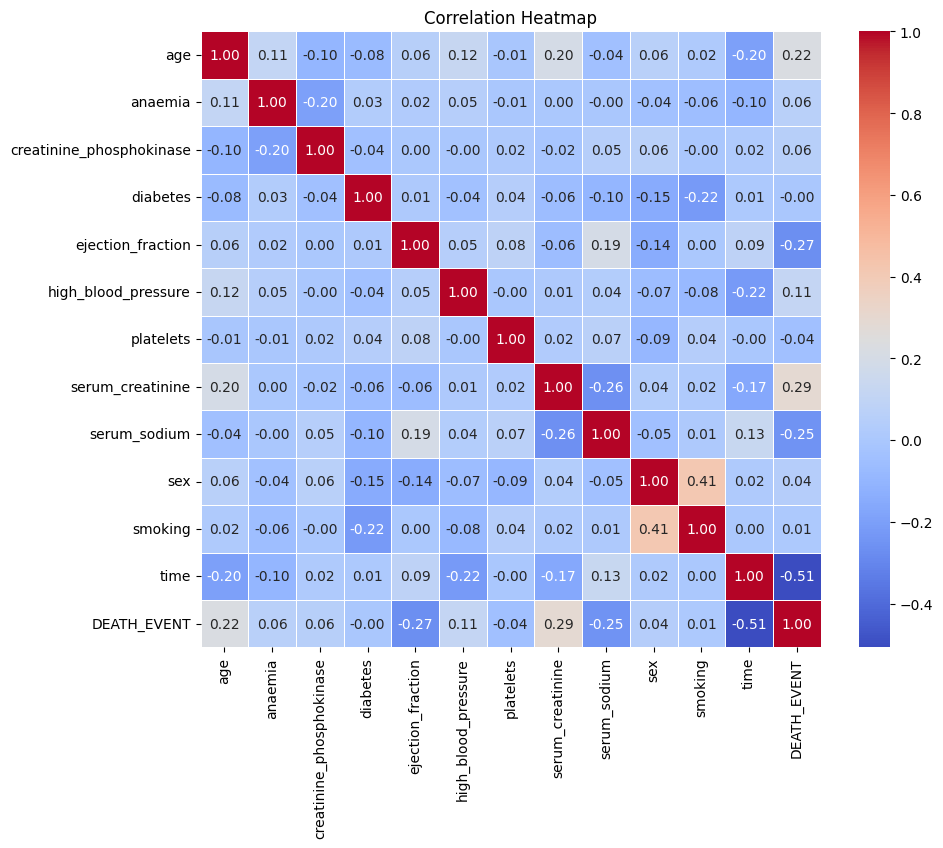

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'correlation_matrix' is your calculated correlation matrix
# Replace 'correlation_matrix' with the name of your correlation matrix if different

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## **Statistical Analysis**

In [18]:
from scipy import stats
from scipy.stats import zscore

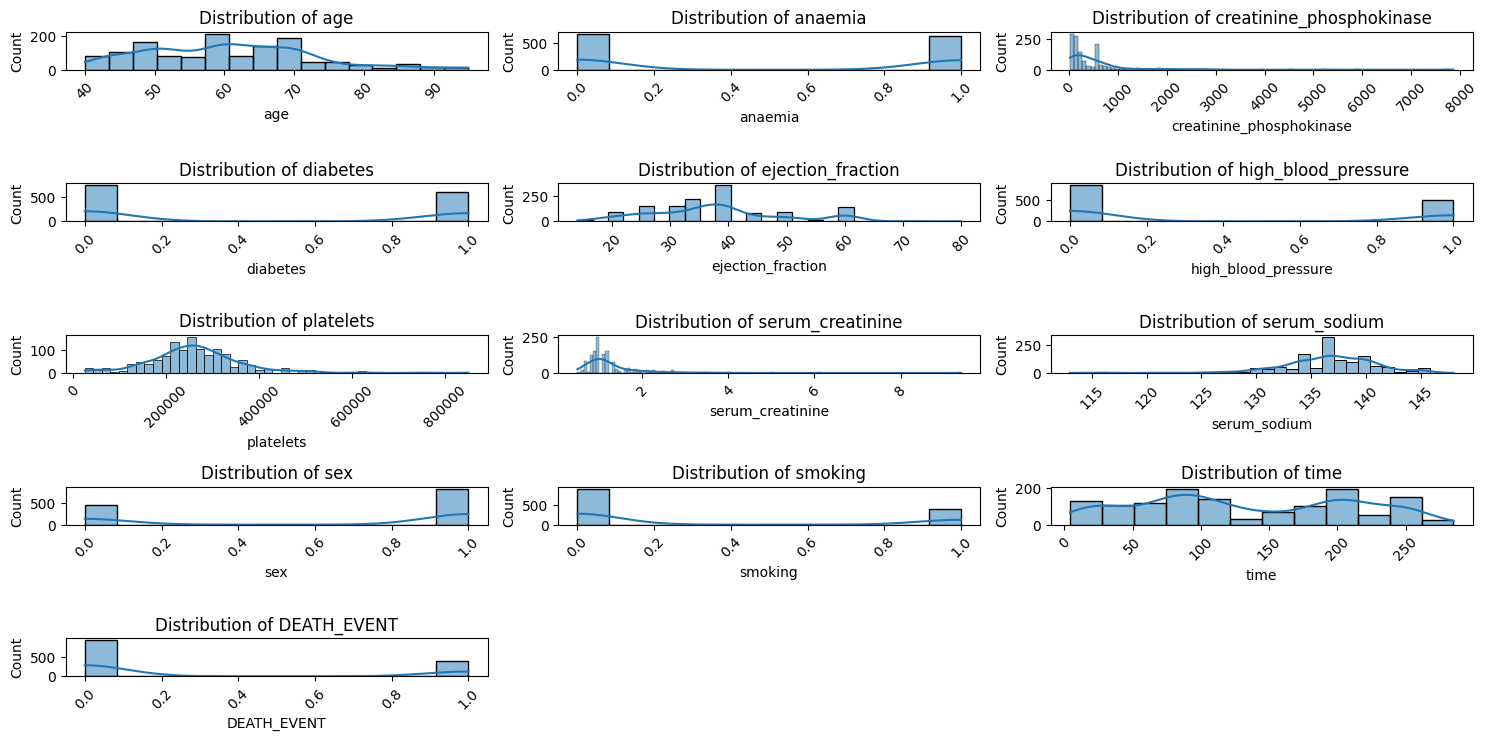

In [19]:
plt.figure(figsize=(15, 10))

# Iterate through each channel and plot on a separate subplot
for i, column in enumerate(data.columns):
    plt.subplot(7, 3, i+1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

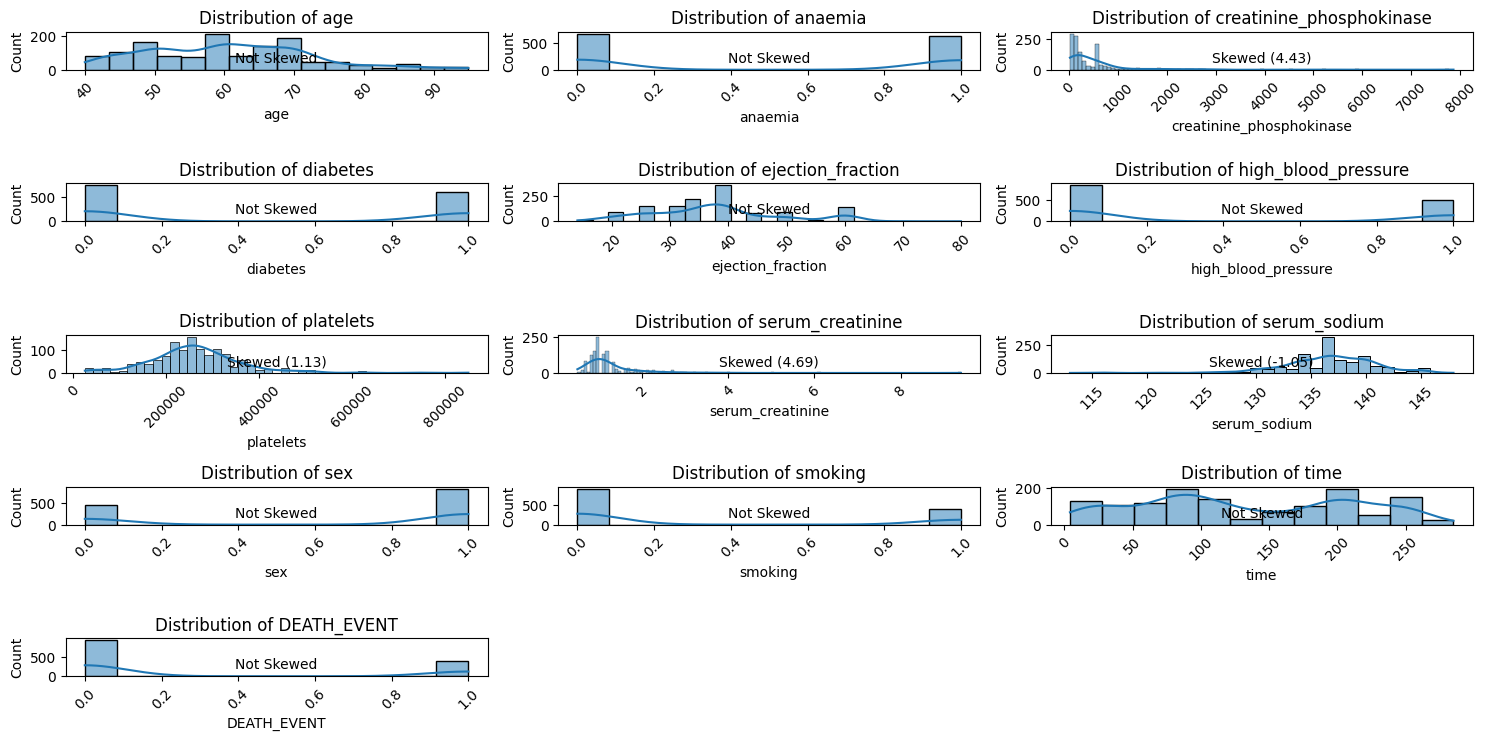

In [20]:
plt.figure(figsize=(15, 10))

# Iterate through each column and plot on a separate subplot
for i, column in enumerate(data.columns):
    plt.subplot(7, 3, i+1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)

    # Check for skewness
    skewness = stats.skew(data[column])
    if skewness < -1 or skewness > 1:
        plt.text(0.5, 0.3, f"Skewed ({skewness:.2f})", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
    else:
        plt.text(0.5, 0.3, f"Not Skewed", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

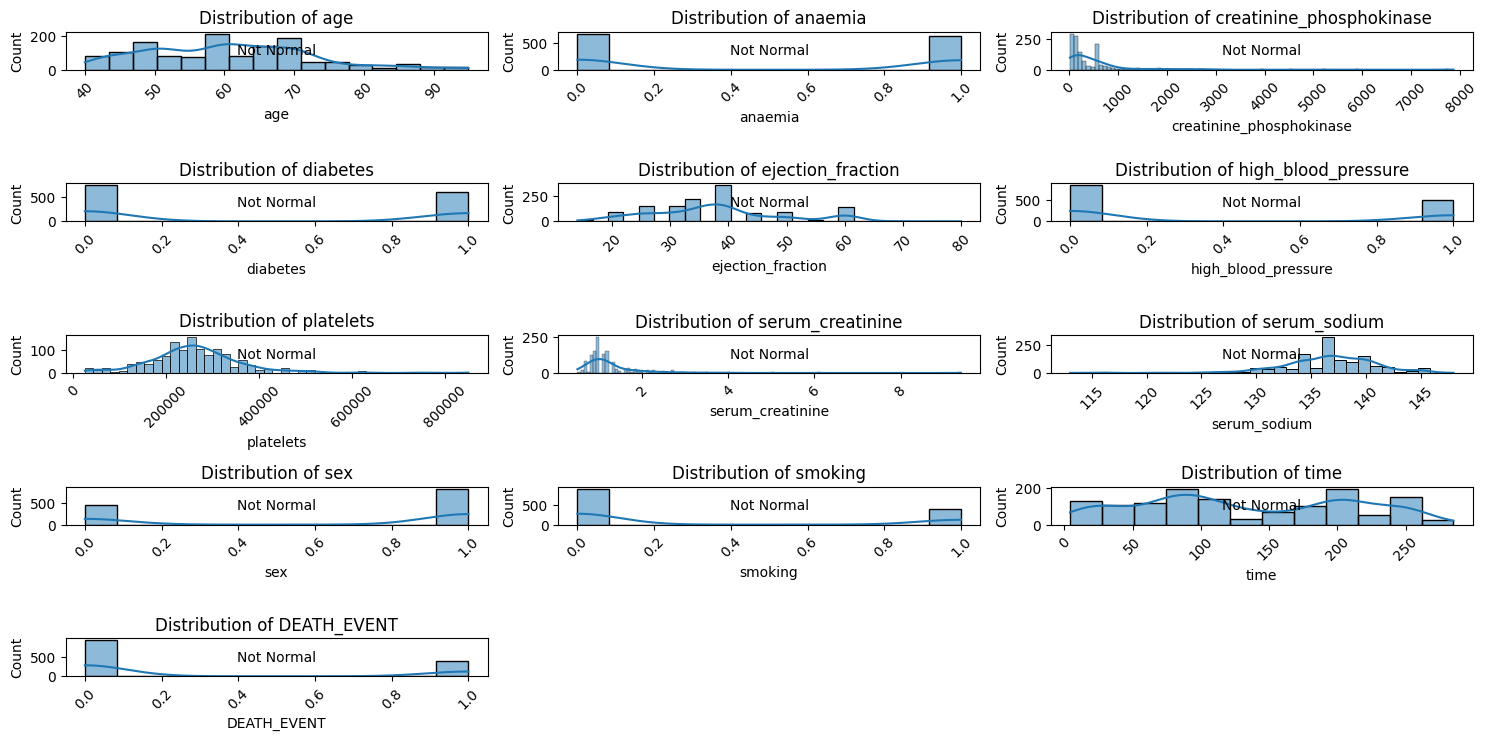

In [21]:
plt.figure(figsize=(15, 10))

# Iterate through each column and plot on a separate subplot
for i, column in enumerate(data.columns):
    plt.subplot(7, 3, i+1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)

    # Add additional analysis to detect distribution type
    # Check for normal distribution
    k2, p = stats.normaltest(data[column])
    if p < 0.05:
        plt.text(0.5, 0.5, "Not Normal", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
    else:
        plt.text(0.5, 0.5, "Normal", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [22]:
# Function to detect outliers using Z-score for a specific column
def detect_outliers_z_score(data, threshold=3):
    z_scores = (data - data.mean()) / data.std()
    outliers = (np.abs(z_scores) > threshold).any(axis=1)
    return outliers

In [23]:
# Detect outliers for each numeric column
outliers = detect_outliers_z_score(data[data.columns])

# Print indices of rows containing outliers
outlier_indices = data.index[outliers].tolist()
print("Index of rows with outliers:", outlier_indices)
print("Count of outliers:", len(outlier_indices))

Index of rows with outliers: [1, 41, 60, 79, 85, 89, 118, 137, 147, 150, 173, 176, 188, 217, 220, 241, 260, 273, 275, 296, 370, 372, 451, 453, 469, 516, 531, 537, 555, 576, 578, 601, 609, 615, 620, 673, 712, 730, 856, 879, 882, 886, 893, 903, 908, 918, 927, 938, 964, 1002, 1030, 1035, 1064, 1074, 1101, 1123, 1129, 1140, 1164, 1166, 1171, 1216, 1245, 1277, 1281, 1291, 1357, 1375, 1400, 1422, 1448, 1457, 1467, 1496, 1508, 1540, 1581, 1712, 1768, 1821, 1893, 2235, 2334, 2360, 3173, 3904]
Count of outliers: 86


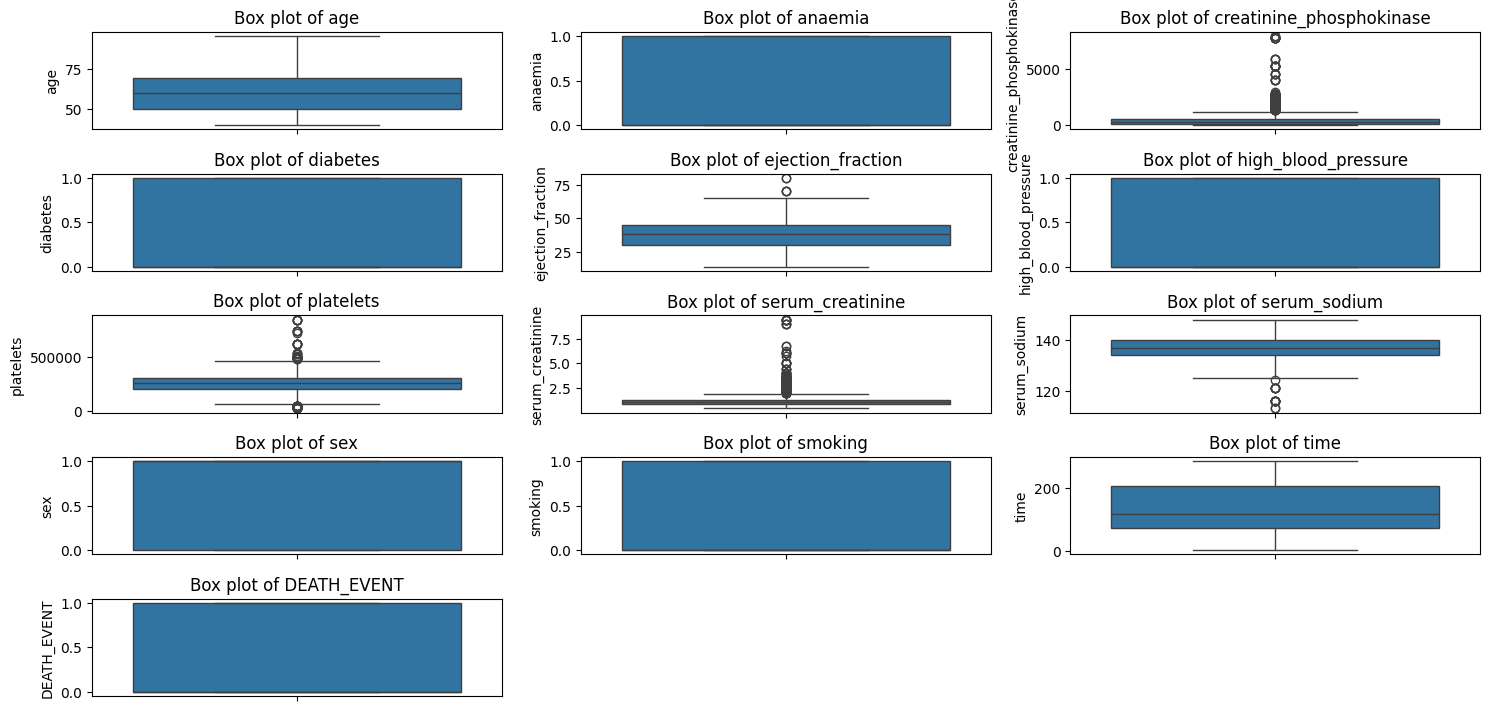

In [24]:
plt.figure(figsize=(15, 10))

# Iterate through each column and plot on a separate subplot
for i, column in enumerate(data.columns):
    plt.subplot(7, 3, i+1)
    sns.boxplot(data[column])
    plt.title(f'Box plot of {column}')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [25]:
# Remove outliers based on Z-score for a specific column
def remove_outliers_z_score_column(data_column, threshold=3):
    z_scores = zscore(data_column)
    filtered_data = data_column[np.abs(z_scores) <= threshold]
    return filtered_data

In [26]:
updated_data = remove_outliers_z_score_column(data)

In [27]:
# Detect outliers for each numeric column
outliers = detect_outliers_z_score(updated_data[updated_data.columns])

# Print indices of rows containing outliers
outlier_indices = updated_data.index[outliers].tolist()
print("Index of rows with outliers:", outlier_indices)
print("Count of outliers:", len(outlier_indices))

Index of rows with outliers: [12, 29, 38, 70, 120, 123, 154, 172, 192, 197, 199, 233, 243, 246, 265, 279, 292, 298, 358, 389, 419, 421, 433, 443, 492, 506, 526, 528, 534, 537, 543, 559, 579, 588, 600, 608, 628, 629, 655, 668, 671, 696, 699, 718, 721, 741, 759, 794, 805, 842, 922, 924, 928, 933, 941, 1002, 1046, 1081, 1115, 1136, 1151, 1177, 1193, 1217, 1297, 1307, 1322, 1377, 1384, 1392, 1505, 1507, 1517, 1576, 1591, 1614, 1653, 1686, 1699, 1757, 1998, 2025, 2880]
Count of outliers: 83
